In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2
import skimage.io as io

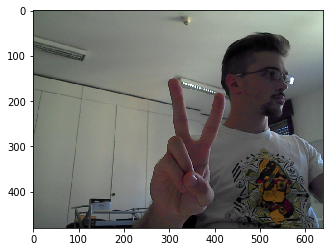

In [270]:
img = io.imread("1-color_2.png")
plt.imshow(img)


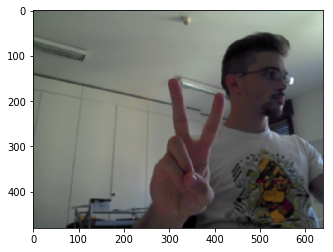

In [271]:
img = cv2.GaussianBlur(img,(5,5),4)
plt.imshow(img)

In [272]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

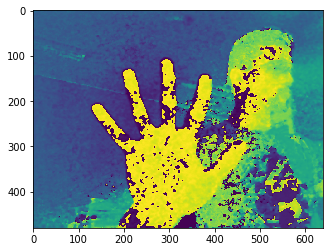

In [264]:
plt.imshow(img_hsv[:, :, 0])

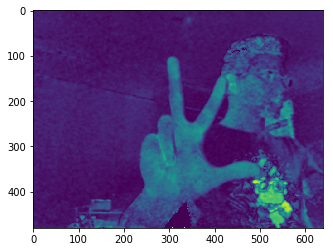

In [200]:
plt.imshow(img_hsv[:, :, 1])

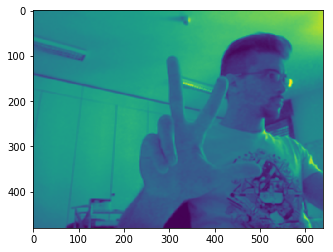

In [201]:
plt.imshow(img_hsv[:, :, 2])

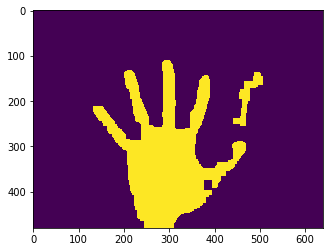

In [152]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, black_tophat
# 315, 94, 37
lower = np.array([170, 30, 80])
upper = np.array([180, 100, 255])
# lower_red = np.array([160, 0, 0])
# upper_red = np.array([190, 255, 255])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(5,5),10)

mask = mask.astype(np.uint8)
kernel = np.ones((15,15))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((10,10))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
kernel = np.ones((17,17))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


mask = mask.astype(np.float32)

plt.imshow(mask)

In [9]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

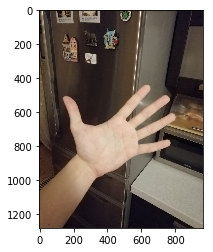

In [27]:
# img = io.imread("1-color_s2_g11.png")
img = io.imread("1-color_2.png")
# img = io.imread("1-color_s3_g9.png")
# img = io.imread("1-color_s4_g4.png")
img = io.imread("k1.jpg")
# img = io.imread("3-color_s4_g1.png")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
plt.imshow(img)

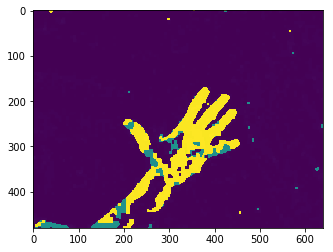

In [33]:
img = io.imread("fgmask1.jpg")
img += io.imread("fgmask2.jpg")
img += io.imread("fgmask3.jpg")

img = img.astype(np.uint8)
kernel = np.ones((3,3))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
kernel = np.ones((5,5))
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(img)

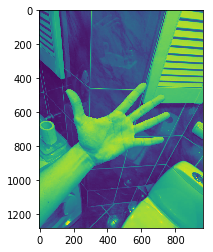

In [816]:
plt.imshow(img_hsv[:, :, 0])

In [817]:
# mean_c = [np.mean(img[:,:,0]), np.mean(img[:,:,1]), np.mean(img[:,:,2])]
# img = img.astype(np.float32) / mean_c
# img = np.uint8(img / np.amax(img) * 255)
# plt.imshow(img)

In [818]:
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

In [819]:
# img[:,:,2].max()

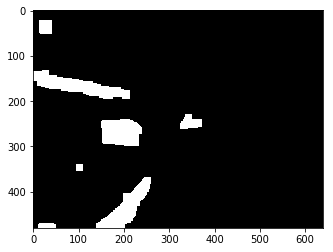

In [26]:
# lower = np.array([170, 30, 70])
# upper = np.array([180, 100, 100])

# lower = np.array([170, 30, 80])
# upper = np.array([180, 100, 100])

lower = np.array([170, 40, 80])
upper = np.array([180, 255, 255])

# lower = np.array([150, 40, 110])
# upper = np.array([200, 110, 150])

# (0, 133, 77)
# (255, 173, 127)

lower = np.array([80, 70, 140])
upper = np.array([255,135, 170])

# lower = np.array([90, 70, 135])
# upper = np.array([205,135, 180])

mask = cv2.inRange(img_hsv, lower, upper)

# mask = cv2.GaussianBlur(mask,(3,3),7)

mask = mask.astype(np.uint8)
kernel = np.ones((17,17))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((15,15))
# mask = cv2.GaussianBlur(mask,(7,7),7)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((25,25))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # mask_red[mask_red != 255] = 0


# mask = mask.astype(np.uint8)
# kernel = np.ones((10,10))
# mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# kernel = np.ones((3,3))
# # mask = cv2.GaussianBlur(mask,(7,7),7)
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
# kernel = np.ones((25,25))
# # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
# # # mask_red[mask_red != 255] = 0

# mask = cv2.GaussianBlur(mask,(9,9),7)
mask = mask.astype(np.float32)

plt.imshow(mask, cmap='gray')

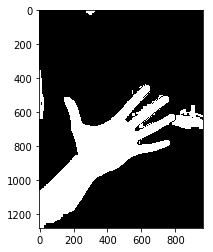

In [835]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_gray = cv2.GaussianBlur(img_gray,(9,9),7)
def get_edges(img):
    x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    return np.hypot(x_sobel, y_sobel)

edges = get_edges(img_gray)
# edges = cv2.Canny(img_gray,50,100)
# kernel = np.ones((7,7))
# edges = cv2.dilate(edges,kernel,iterations = 1)
kernel = np.ones((15,15))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

edges /= np.amax(edges)

_, edges = cv2.threshold(edges, 0.1, 1, cv2.THRESH_BINARY)

mask = 1 - ((1 - mask / 255.).astype(np.uint8) | edges.astype(np.uint8))
mask = np.uint8(mask * 255)

# kernel = np.ones((7,7))
# edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
# kernel = np.ones((5,5))
# edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

plt.imshow(mask, cmap='gray')

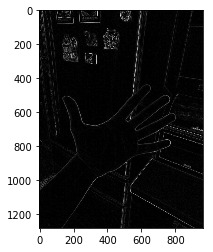

In [836]:
plt.imshow(get_edges(img_gray), cmap='gray')

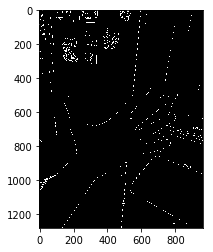

In [837]:
# edges = get_edges(img_gray)
edges = cv2.Canny(img_gray,100,200)
kernel = np.ones((7,7))
# edges = cv2.dilate(edges,kernel,iterations = 1)
kernel = np.ones((7,7))
# edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
edges = cv2.adaptiveThreshold((255 - edges).astype(np.uint8),255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
# edges /= np.amax(edges)

# _, edges = cv2.threshold(edges, 0.2, 1, cv2.THRESH_BINARY)
plt.imshow(255. - edges, cmap='gray')

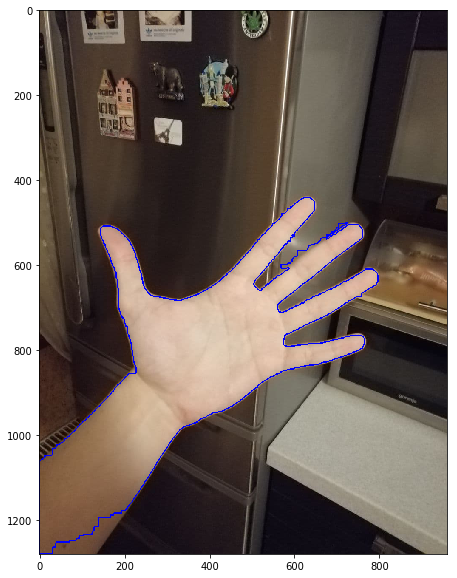

In [838]:
_, contours, _ = cv2.findContours(np.uint8(mask), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
# print("??", contours, len(contours))
#     if(len(contours) == 1):
#         return None, None
    
# \

c = max(contours, key = cv2.contourArea)

# hull = cv2.convexHull(contours[cnt_id])

# contours[cnt_id] = hull
plt.figure(figsize=(10,10))
img_cnt = cv2.drawContours(img.copy(), c, -1, (0, 0, 255), 2)



plt.imshow(img_cnt)

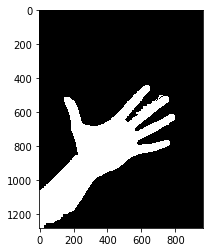

In [839]:
canvas = np.zeros((img.shape[0], img.shape[1], 3)).astype(np.uint8)
cv2.drawContours(canvas, [c], -1, (255, 255, 255), -1)

x,y,w,h = cv2.boundingRect(c)
# cv2.rectangle(canvas,(x,y),(x+w,y+h),(0,255,0),2)


plt.imshow(canvas)

In [840]:
w, h

(798, 839)

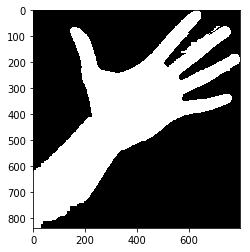

In [841]:
plt.imshow(canvas[y:(y+h), x:(x+w)])

273 1280 0 957


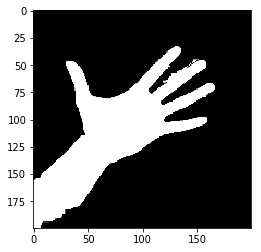

In [842]:
ly = max(0, int(y - h * 0.2))
ry = min(canvas.shape[0], int(y + h + h * 0.2))
tx = max(0, int(x - w * 0.2))
bx = min(canvas.shape[1], int(x + w + w * 0.2))



resized = cv2.resize(canvas[ly:ry, tx:bx], (200, 200))
plt.imshow(resized)
print(ly, ry, tx, bx)

In [843]:
_, resized = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

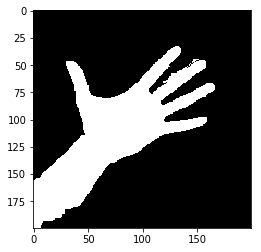

In [844]:
plt.imshow(resized)

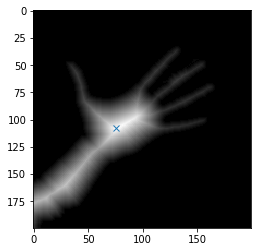

In [845]:
# dst = np.zeros(resized.shape, dtype= )
dst = cv2.distanceTransform(resized[:, :, 0], cv2.DIST_L2, 3)
plt.imshow(dst, cmap='gray')
c = np.unravel_index(np.argmax(dst), dst.shape)
palm_c = np.array([c[0], c[1]])
plt.plot(palm_c[1], palm_c[0], 'x')

In [846]:
np.unravel_index(np.argmax(dst), dst.shape)

(108, 76)

In [847]:
np.max(dst) * 1.2

34.228363037109375

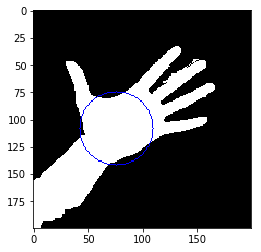

In [848]:
center_coordinates = (palm_c[1], palm_c[0])
 
# Radius of circle
radius = int(np.max(dst) * 1.2)
  
# Blue color in BGR
color = (0, 0, 255)
  
# Line thickness of 2 px
thickness = 1
  
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
image = cv2.circle(resized.copy(), center_coordinates, radius, color, thickness)
plt.imshow(image)

In [858]:
def find_nearest_boundary_points(mask, center, sampled_points):
    nearest_boundary_points = []
    dists = []
    history = []
    for point in sampled_points:
#         direction = np.array(point[[1, 0]])

        direction = point - center
        angle0 = np.arccos(np.dot(direction, [1, 0]) / np.linalg.norm(direction)) / np.pi * 180
        if direction[0] < 0:
            angle0 = -angle0
#         print("angle:", angle0)
        rad, angle = 0.0, angle0
#         point = point[[1, 0]]
        while(True):
#             print("point:", point)
                
                
            
            x = int(np.cos(angle * np.pi / 180) * rad + np.float32(point[0]))
            y = int(np.sin(angle * np.pi / 180) * rad + np.float32(point[1]))
            if not (0 <= x < mask.shape[0] and 0 <= y < mask.shape[1]):
                break
#             print("?", x, y)
            history.append((x, y))
            if mask[x, y] == 0:
                    
#                 print("yes!", x, y, mask[x, y])
#                 history.append()
#                 print(mask[x+1, y] + mask[x+1, y+1] + \
#                 mask[x, y+1] + mask[x-1, y+1] + \
#                 mask[x-1, y] + mask[x-1, y-1] + \
#                 mask[x, y-1] + mask[x + 1, y-1])
                if mask[x+1, y] + mask[x+1, y+1] + \
                mask[x, y+1] + mask[x-1, y+1] + \
                mask[x-1, y] + mask[x-1, y-1] + \
                mask[x, y-1] + mask[x + 1, y-1] < 255 * 8:
#                     print("yup")
                    nearest_boundary_points.append((x, y))
                    dists.append(np.sqrt((point[0] - x) ** 2 + (point[1] - y) ** 2))
                    break
            rad += 0.1
            angle += 10
    return np.array(nearest_boundary_points), np.array(dists), history

def sample_circle_points(r, x0, y0, n):
    t = np.random.randint(0, 360, n)
    x = r * np.cos(t * np.pi / 180) + x0
    y = r * np.sin(t * np.pi / 180) + y0
    return np.array([x, y]).T

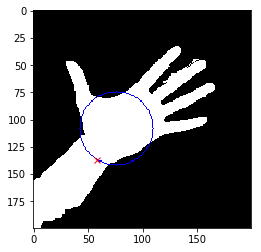

In [859]:
points = sample_circle_points(radius, *palm_c, 1)
nearest, dists, history = find_nearest_boundary_points(resized[:, :, 0].astype(np.float32).copy(), palm_c, points)
plt.imshow(image)
plt.plot(points[:, 1], points[:, 0], 'x', color='r')

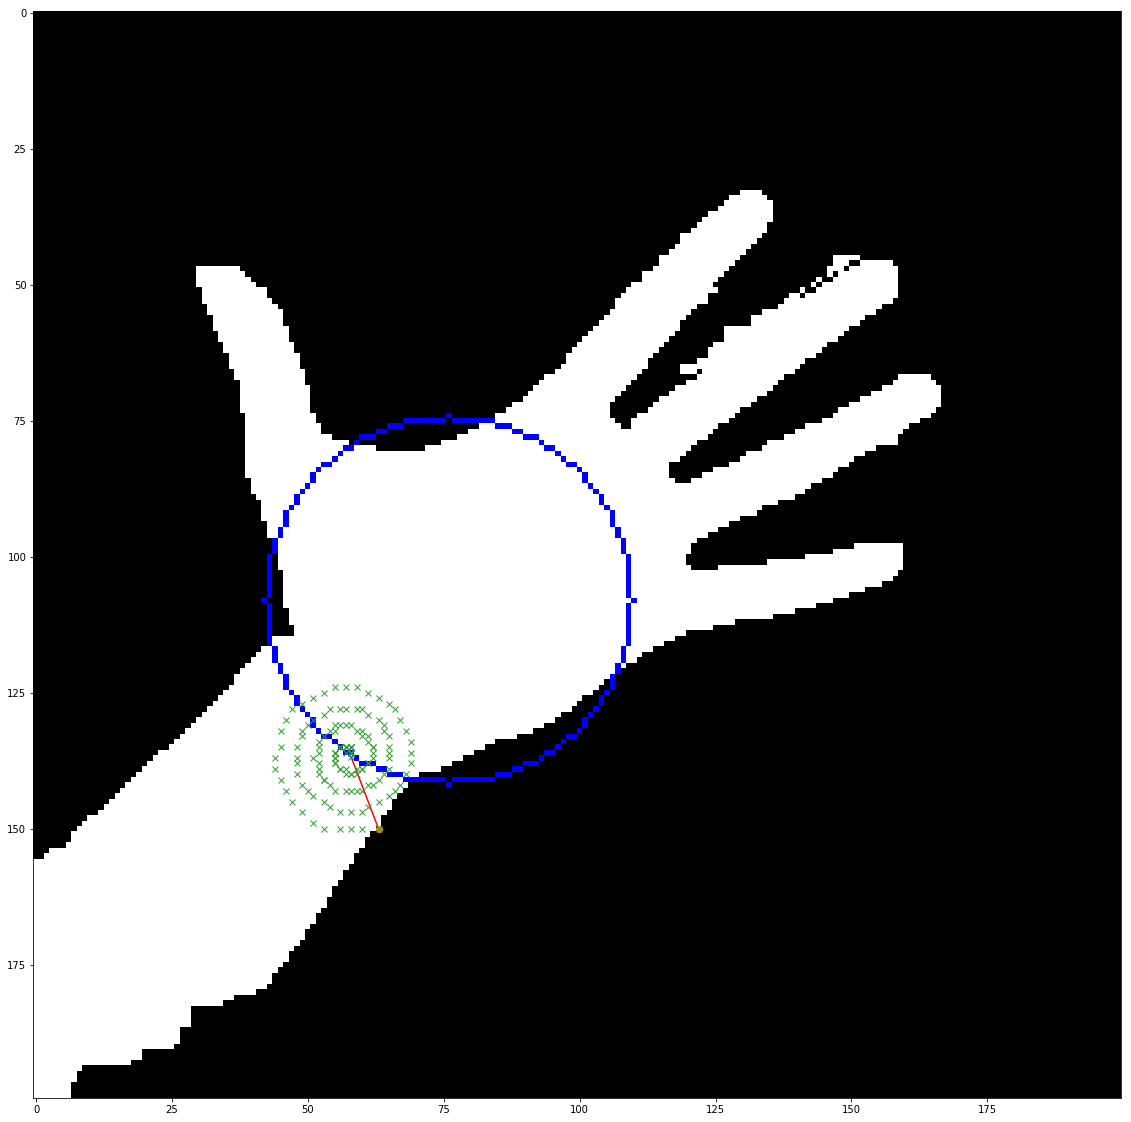

In [860]:
plt.figure(figsize=(20,20))
plt.imshow(image)
for point, nearest_point in zip(points, nearest):
#     print(point)
#     print(nearest_point)
    plt.plot([point[1], nearest_point[1]], [point[0], nearest_point[0]], color='r')
    plt.plot(point[1], point[0], 'x')
    plt.plot(nearest_point[1], nearest_point[0], 'o')
history = np.array(history)
plt.plot(history[:, 1], history[:, 0], 'x')

In [861]:
nearest.shape

(1, 2)

In [862]:
mask.max()

255

In [863]:
def find_nearest_boundary_points(mask, center, sampled_points):
    nearest_boundary_points = []
    dists = []
    for point in sampled_points:
        direction = point - center
        angle0 = np.arccos(np.dot(direction, [1, 0]) / np.linalg.norm(direction)) / np.pi * 180
        if direction[0] < 0:
            angle0 = -angle0
        rad, angle = 0.0, angle0
        while(True):
            x = int(np.cos(angle * np.pi / 180) * rad + np.float32(point[0]))
            y = int(np.sin(angle * np.pi / 180) * rad + np.float32(point[1]))
            if not (0 <= x < mask.shape[0] and 0 <= y < mask.shape[1]):
                break
            if mask[x, y] == 0:
                if mask[x+1, y] + mask[x+1, y+1] + \
                mask[x, y+1] + mask[x-1, y+1] + \
                mask[x-1, y] + mask[x-1, y-1] + \
                mask[x, y-1] + mask[x + 1, y-1] < 255 * 8:
                    nearest_boundary_points.append((x, y))
                    dists.append(np.sqrt((point[0] - x) ** 2 + (point[1] - y) ** 2))
                    break
            rad += 0.1
            angle += 10
    return np.array(nearest_boundary_points).T, np.array(dists)

def sample_circle_points(r, x0, y0, n):
    t = np.random.randint(0, 360, n)
    x = r * np.cos(t * np.pi / 180) + x0
    y = r * np.sin(t * np.pi / 180) + y0
    return np.array([x, y]).T


def find_nearest_boundary_points(mask, center, sampled_points):
    nearest_boundary_points = []
    dists = []
    
    for point in sampled_points:
        direction = point - center
        angle0 = np.arccos(np.dot(direction, [1, 0]) / np.linalg.norm(direction)) / np.pi * 180
        if direction[0] < 0:
            angle0 = -angle0
        rad, angle = 0.0, angle0
        while(True):
            x = int(np.cos(angle * np.pi / 180) * rad + np.float32(point[0]))
            y = int(np.sin(angle * np.pi / 180) * rad + np.float32(point[1]))
            if not (0 <= x < mask.shape[0] and 0 <= y < mask.shape[1]):
                break
            if mask[x, y] == 0:
                if mask[x+1, y] + mask[x+1, y+1] + \
                mask[x, y+1] + mask[x-1, y+1] + \
                mask[x-1, y] + mask[x-1, y-1] + \
                mask[x, y-1] + mask[x + 1, y-1] < 255 * 8:
                    nearest_boundary_points.append((x, y))
                    dists.append(np.sqrt((point[0] - x) ** 2 + (point[1] - y) ** 2))
                    break
            rad += 0.1
            angle += 10
    return np.array(nearest_boundary_points), np.array(dists)

def sample_circle_points(r, x0, y0, n):
    t = np.sort(np.random.randint(0, 360, n))
    x = r * np.cos(t * np.pi / 180) + x0
    y = r * np.sin(t * np.pi / 180) + y0
    return np.array([x, y]).T

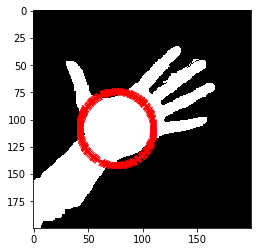

In [864]:
points = sample_circle_points(radius, *palm_c, 400)
nearest, dists = find_nearest_boundary_points(resized[:, :, 0].astype(np.float32).copy(), palm_c, points)
plt.imshow(image)
plt.plot(points[:, 1], points[:, 0], 'x', color='r')

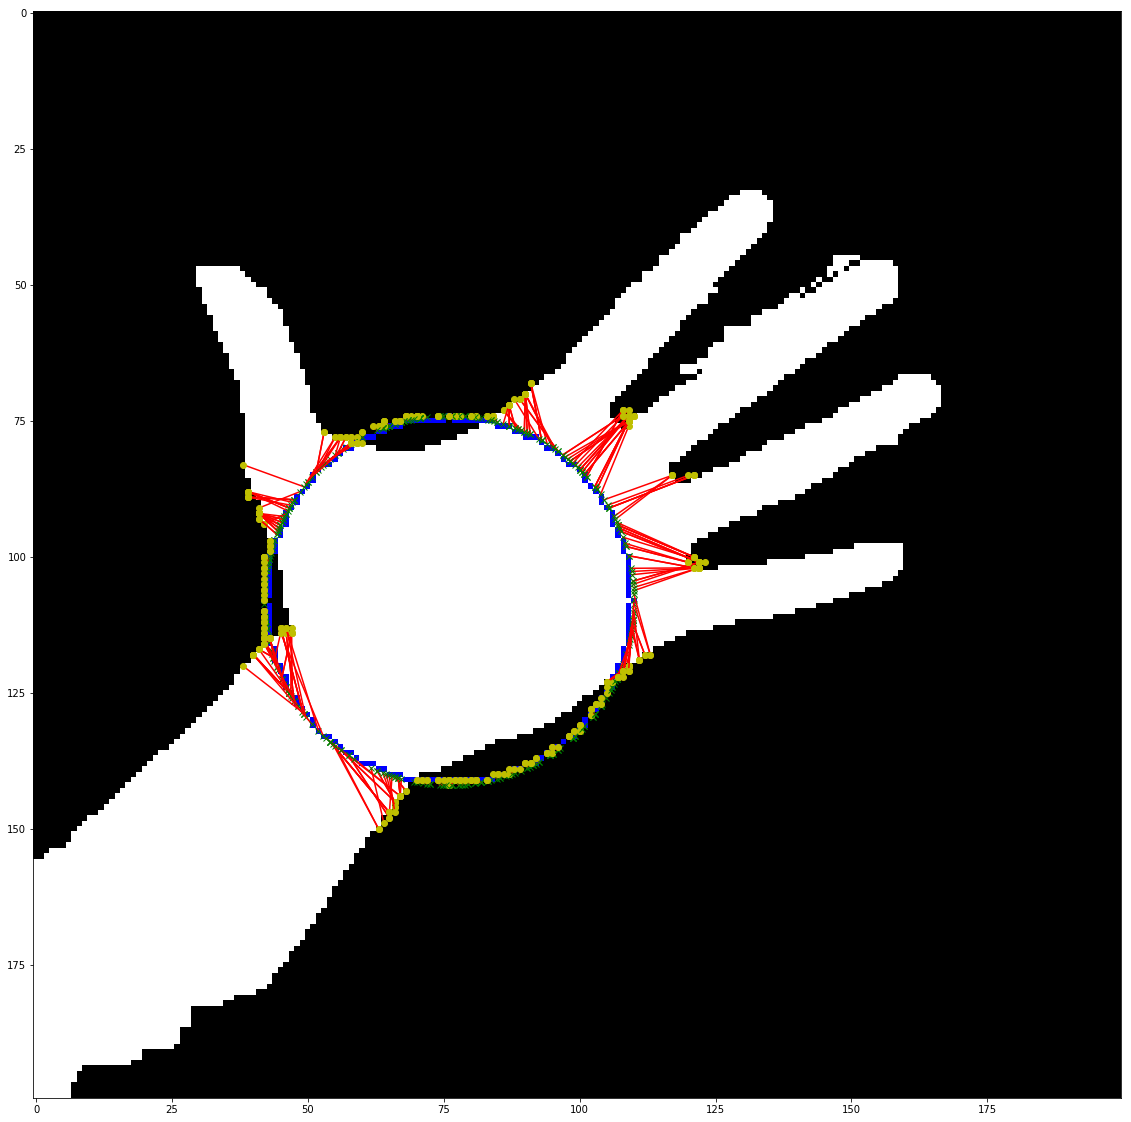

In [865]:
plt.figure(figsize=(20,20))
plt.imshow(image)
for point, nearest_point in zip(points, nearest):
#     print(point)
#     print(nearest_point)
    plt.plot([point[1], nearest_point[1]], [point[0], nearest_point[0]], color='r')
    plt.plot(point[1], point[0], 'x', color='g')
    plt.plot(nearest_point[1], nearest_point[0], 'o', color='y')

In [866]:
max_dist = 0
wrist_points = ()
for i in range(nearest.shape[0] - 1):
    if np.linalg.norm(nearest[i] - nearest[i+1]) > max_dist:
        max_dist = np.linalg.norm(nearest[i] - nearest[i+1])
        wrist_points = (i, i+1)
if np.linalg.norm(nearest[nearest.shape[0] - 1] - nearest[0]) > max_dist:
    max_dist = np.linalg.norm(nearest[nearest.shape[0] - 1] - nearest[0])
    wrist_points = (nearest.shape[0] - 1, 0)


In [867]:
wrist_points

(364, 365)

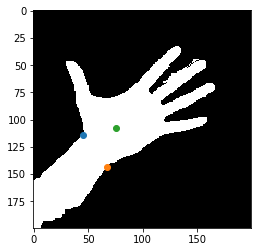

In [870]:
# plt.figure(figsize=(20,20))
plt.imshow(resized)
plt.plot(nearest[wrist_points[0]][1], nearest[wrist_points[0]][0], 'o')
plt.plot(nearest[wrist_points[1]][1], nearest[wrist_points[1]][0], 'o')
plt.plot(palm_c[1], palm_c[0], 'o')

In [874]:
wrist1 = nearest[wrist_points[0]]
wrist2 = nearest[wrist_points[1]]

In [871]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [877]:
direction = (wrist1 - palm_c + wrist2 - palm_c) / 2
angle = np.arccos(np.dot(direction, [1, 0]) / np.linalg.norm(direction))
angle = angle / np.pi * 180
if direction[0] < 0:
    angle = -angle
angle

43.60281897270363

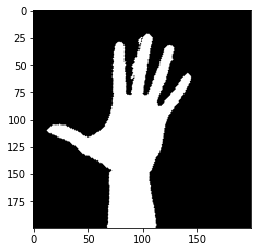

In [878]:
rot = rotate_image(resized.copy(), angle)
plt.imshow(rot)

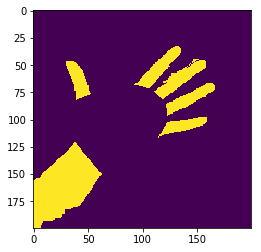

In [911]:
hull = cv2.convexHull(nearest)[:, 0, :]
# hull = hull[[1, 0]]
# plt.imshow(resized)
fingers = np.zeros((resized.shape[0], resized.shape[1]), dtype=np.uint8)
fingers = cv2.drawContours(fingers, [hull[:, [1, 0]]], -1, (255.), -1)

fingers = np.uint8(resized[:, :, 0]) & (255 - fingers)

plt.imshow(fingers)

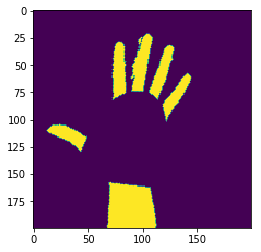

In [912]:
rot = rotate_image(fingers.copy(), angle)
plt.imshow(rot)